In [1]:
# -*- coding:utf-8 -*-
import matplotlib as mpl
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
%matplotlib inline

c:\anaconda2\envs\python35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
start_date = '2017-07-01'
end_date = '2017-11-17'
stock_selected = '000050'
data = ts.get_k_data(stock_selected,start_date,end_date)

In [3]:
# 导入两个涉及的库
from matplotlib.pylab import date2num
import datetime
import numpy as np
import pandas as pd

In [8]:
data[data['volume']==0]=np.nan
data=data.dropna()
data.sort_values(by='date',ascending=True,inplace=True)
data=data[['date','open','close','high','low','volume']]

In [9]:
date_tickers=data.date.values

In [10]:
#date_ticker[0]

In [11]:
#change data to matrix
data_mat=data.as_matrix()
#data_mat[1:,0]=np.arange(0:len(data_mat[1:,0]))
data_mat[:,0]=np.arange(0,len(data_mat[:,0]))

In [12]:
import matplotlib.ticker as ticker


def format_date(x,pos=None):
    if x<0 or x>len(date_tickers)-1:
        return ''
    return date_tickers[int(x)]

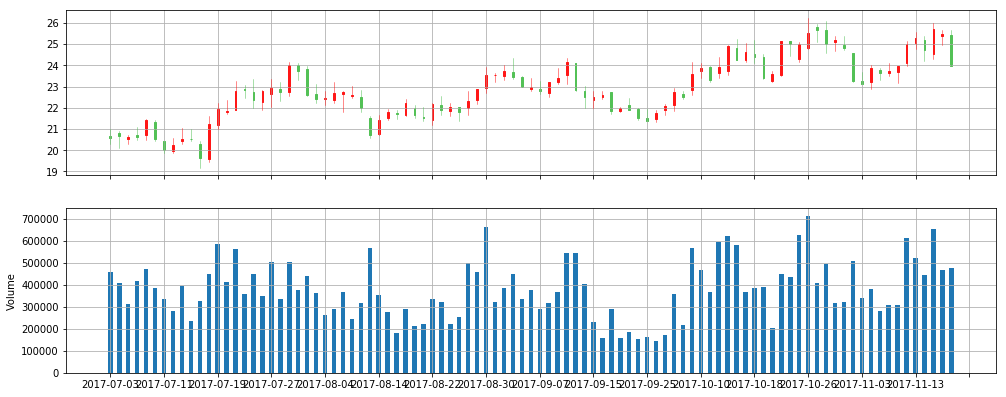

In [13]:
fig,(ax1,ax2)=plt.subplots(2, sharex=True,figsize=(1200/72,480/72))
mpf.candlestick_ochl(ax1,data_mat,colordown='#53c156', colorup='#ff1717',width=0.2)


ax1.grid(True)
ax1.xaxis_date()

plt.bar(data_mat[:,0],data_mat[:,5],width=0.5)
ax2.set_ylabel('Volume')

ax2.xaxis.set_major_locator(ticker.MultipleLocator(6))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax2.grid(True)
plt.show()